## 1. The Way of the Program

#### Exercise 1-1
1. In a print statement, what happens if you leave out one of the parentheses, or both?

2. If you are trying to print a string, what happens if you leave out one of the quotation marks, or both?

3. You can use a minus sign to make a negative number like -2. What happens if you put a plus sign before a number? What about 2++2?

4. In math notation, leading zeros are okay, as in 02. What happens if you try this in Julia?

5. What happens if you have two values with no operator between them?

#### Exercise 1-2
1. How many seconds are there in 42 minutes 42 seconds?
2. How many miles are there in 10 kilometers?
3. If you run a 10-kilometer race in 37 minutes 48 seconds, what is your average pace (time per mile in minutes and seconds)? What is your average speed in miles per hour?

In [1]:
println("Total seconds: $(43 * 60)")

Total seconds: 2580


In [2]:
println("10 km equal $(10 / 1.61) miles")

10 km equal 6.211180124223602 miles


In [3]:
total_seconds = 37 * 60 + 48
miles = 10 / 1.61
pace = total_seconds / miles
min, sec = divrem(pace, 60)
println("Average pace: $min minutes $(round(sec)) seconds per mile")

Average pace: 6.0 minutes 5.0 seconds per mile


In [4]:
print("Average speed: $(round(miles / total_seconds * 3600)) mph")

Average speed: 10.0 mph

## 2. Variables, Expressions and Statements

#### Exercise 2-3

1. The volume of a sphere with radius $r$ is $\frac{4}{3}43\pi r^3$. What is the volume of a sphere with radius 5?

2. Suppose the cover price of a book is `$24.95`, but bookstores get a `40%` discount. Shipping costs `$3` for the first copy and 75 cents for each additional copy. What is the total wholesale cost for 60 copies?

3. If I leave my house at 6:52 am and run 1 mile at an easy pace (8:15 per mile), then 3 miles at tempo (7:12 per mile) and 1 mile at easy pace again, what time do I get home for breakfast?

In [5]:
r = 5

volume = round(4 / 3 * π * r ^ 3, digits=1)
print("Volume of a sphere with radius 5 is: $volume")

Volume of a sphere with radius 5 is: 523.6

In [6]:
n = 60
price = 24.95 * 0.6  # 40% discount
shipping_cost = 3 + (n-1) * .75
total = round(n * price + shipping_cost, digits=2)
print("Total wholesale cost for $n copies: \$$total")

Total wholesale cost for 60 copies: $945.45

In [7]:
easy = 8 * 60 + 15
tempo = 7 * 60 + 12

total_sec = easy * 2 + tempo * 3
min, sec = divrem(total_sec, 60)
println("Total run time: $min minutes, $sec seconds")

println("If I leave my house at 6:52 am, I'll get home at 7:30 am")

Total run time: 38 minutes, 6 seconds
If I leave my house at 6:52 am, I'll get home at 7:30 am


## 3. Functions

#### Exercise 3-2
Write a function named rightjustify that takes a string named s as a parameter and prints the string with enough leading spaces so that the last letter of the string is in column 70 of the display.

In [8]:
function rightjustify(s)
    space = 70 - length(s)
    print("$(" " ^ space)$s")
end
rightjustify("Meo meo")

                                                               Meo meo

#### Exercise 3-3
1. Type this example into a script and test it.

2. Modify dotwice so that it takes two arguments, a function object and a value, and calls the function twice, passing the value as an argument.

3. Copy the definition of printtwice from earlier in this chapter to your script.

4. Use the modified version of dotwice to call printtwice twice, passing "spam" as an argument.

5. Define a new function called dofour that takes a function object and a value and calls the function four times, passing the value as a parameter. There should be only two statements in the body of this function, not four.

In [9]:
function dotwice(f)
    f()
    f()
end

function printspam()
    println("spam")
end

dotwice(printspam)

spam
spam


In [10]:
function dotwice(f, v)
    f(v)
    f(v)
end

function printtwice(t)
    println(t)
    println(t)
end

dotwice(printtwice, "spam")

spam
spam
spam
spam


In [11]:
function dofour(f, v)
    dotwice(f, v)
    dotwice(f, v)
end

dofour(println, "Ahihi")

Ahihi
Ahihi
Ahihi
Ahihi


#### Exercise 3-4

In [12]:
function print_border()
    println("+ - - - - + - - - - +")
end

function print_row()
    for i in 1:4
        println("|         |         |")
    end
end

function print_grid(n=2)
    for i in 1:n
        print_border()
        print_row()
    end
    print_border()
end

print_grid()

+ - - - - + - - - - +
|         |         |
|         |         |
|         |         |
|         |         |
+ - - - - + - - - - +
|         |         |
|         |         |
|         |         |
|         |         |
+ - - - - + - - - - +


## 4. Case Study: Interface Design

In [13]:
# import Pkg; Pkg.add(url="https://github.com/BenLauwens/ThinkJulia.jl")

In [14]:
# import Pkg; Pkg.add("Luxor")

In [27]:
using ThinkJulia, Luxor

┌ Info: Precompiling ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29]
└ @ Base loading.jl:1342
┌ Info: Skipping precompilation since __precompile__(false). Importing ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29].
└ @ Base loading.jl:1047


In [28]:
🐢 = Turtle(-100, -100)

Turtle(-100.0, -100.0, true, 0.0, (0.0, 0.0, 0.0))

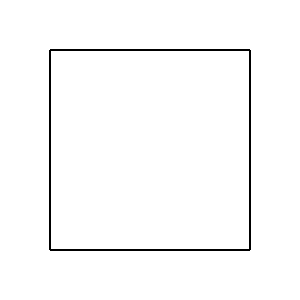

In [29]:
@draw begin
    for i in 1:4
        forward(🐢, 200)
        turn(🐢, 90)
    end
end 300 300

#### Exercise 4-2
Write a function called `square` that takes a parameter named `t`, which is a turtle. It should use the turtle to draw a square.
#### Exercise 4-3
Write a function call that passes `t` as an argument to `square`, and then run the macro again.

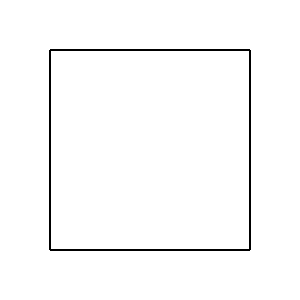

In [30]:
function square(t)
    for i in 1:4
        forward(t, 200)
        turn(t, 90)
    end
end

@draw begin
    square(🐢)
end 300 300

#### Exercise 4-4
Add another parameter, named `len`, to `square`. Modify the body so length of the sides is `len`, and then modify the function call to provide a second argument. Run the macro again. Test with a range of values for len.

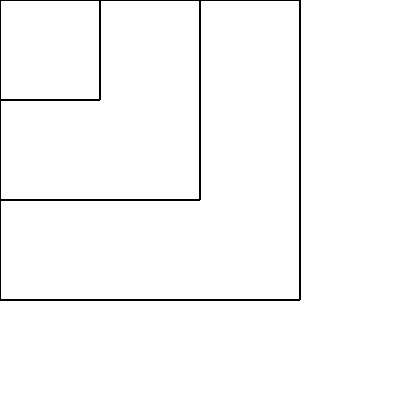

In [31]:
🐢 = Turtle(-200, -200)
function square(t, len)
    for i in 1:4
        forward(t, len)
        turn(t, 90)
    end
end

@draw begin
    for i in 1:3
        square(🐢, i * 100)
    end
end 400 400

#### Exercise 4-5
Make a copy of square and change the name to polygon. Add another parameter named n and modify the body so it draws an n-sided regular polygon.

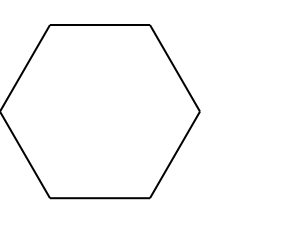

In [32]:
🐢 = Turtle(-100, -100)

function polygon(t, n, len)
    angle = 360 / n
    for i in 1:n
        forward(t, len)
        turn(t, angle)
    end
end

@draw begin
    polygon(🐢, 6, 100)
end 300 250

#### Exercise 4-6
Write a function called `circle` that takes a turtle, `t`, and radius, `r`, as parameters and that draws an approximate circle by calling polygon with an appropriate length and number of sides. Test your function with a range of values of `r`.

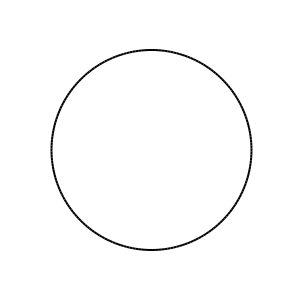

In [33]:
🐢 = Turtle(0, -100)

function ncircle(t, r)
    circumference = 2 * π * r
    n = trunc(circumference / 3) + 3
    len = circumference / n
    polygon(t, n, len)
end

@draw begin
    ncircle(🐢, 100)
end 300 300

#### Exercise 4-7
Make a more general version of circle called `arc` that takes an additional parameter `angle`, which determines what fraction of a circle to draw. `angle` is in units of degrees, so when `angle = 360`, `arc` should draw a complete circle.

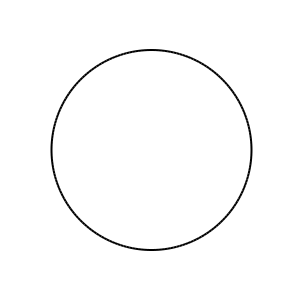

In [34]:
function polyline(t, n, len, angle)
    for i in 1:n
        forward(t, len)
        turn(t, -angle)
    end
end

function polygon(t, n, len)
    angle = 360 / n
    polyline(t, n, len, angle)
end

function narc(t, r, angle)
    arc_len = 2 * π * r * angle / 360
    n = trunc(arc_len / 3) + 1
    step_len = arc_len / n
    step_angle = angle / n
    polyline(t, n, step_len, step_angle)
end

function ncircle(t, r)
    narc(t, r, 360)
end

🐢 = Turtle(0, 100)
@draw begin
    ncircle(🐢, 100)
end 300 300

#### Exercise 4-9
Write an appropriately general set of functions that can draw flowers as in Turtle flowers.


## 5. Conditionals and Recursion

#### Exercise 5-2
The function time returns the current Greenwich Mean Time in seconds since “the epoch”, which is an arbitrary time used as a reference point. On UNIX systems, the epoch is 1 January 1970.  
Write a script that reads the current time and converts it to a time of day in hours, minutes, and seconds, plus the number of days since the epoch.

In [23]:
function parse_date(t)
    days, r = divrem(round(t, digits=0), 86400)
    hours, r1 = divrem(r, 3600)
    minutes, seconds = divrem(r1, 60)
    println("$(Int(days)) days since epoch. Time: $(Int(hours)):$(Int(minutes)):$(Int(seconds))")
end

parse_date(time())

18847 days since epoch. Time: 6:29:16


#### Exercise 5-3
Fermat’s Last Theorem says that there are no positive integers $a$, $b$, and $c$ such that

$$a^n + b^n = c^n$$

for any value of $n$ greater than 2.

Write a function named checkfermat that takes four parameters - `a, b, c and n` - and checks to see if Fermat’s theorem holds. If `n` is greater than 2 and `a^n + b^n == c^n` the program should print, “Holy smokes, Fermat was wrong!” Otherwise the program should print, “No, that doesn’t work.”

Write a function that prompts the user to input values for a, b, c and n, converts them to integers, and uses checkfermat to check whether they violate Fermat’s theorem.

In [24]:
function checkfermat(a, b, c, n)
  a, b, c, n = UInt128(a), UInt128(b), UInt128(c), UInt128(n)
  if (a ^ n + b ^ n) == c ^ n
    return true
  else
    return false
  end
end

for a in 2:100
  for b in 2:100
    for c in 2:100
      for n in 2:20
        if checkfermat(a, b, c, n) && n > 2
          println("a: $a \nb: $b \nc: $c\nn: $n")
          println("Holy smokes, Fermat was wrong!")
        end
      end
    end
  end
end

In [25]:
function istriangle(a, b, c)
    if (a + b < c || b + c < a || a + c < b)
        println("No")
    else
        println("Yes")
    end
end
istriangle(2, 4, 5)

Yes


#### Exercise 5-4
If you are given three sticks, you may or may not be able to arrange them in a triangle. For example, if one of the sticks is 12 inches long and the other two are one inch long, you will not be able to get the short sticks to meet in the middle. For any three lengths, there is a simple test to see if it is possible to form a triangle:

> If you are given three sticks, you may or may not be able to arrange them in a triangle. For example, if one of the sticks is 12 inches long and the other two are one inch long, you will not be able to get the short sticks to meet in the middle. For any three lengths, there is a simple test to see if it is possible to form a triangle:

1. Write a function named `istriangle` that takes three integers as arguments, and that prints either “Yes” or “No”, depending on whether you can or cannot form a triangle from sticks with the given lengths.

2. Write a function that prompts the user to input three stick lengths, converts them to integers, and uses `istriangle` to check whether sticks with the given lengths can form a triangle.

In [30]:
function check_triangle()
    print("Enter 3 length to check if they can form a triangle:")
    a = readline()
    b = readline()
    c = readline()
    @show a b c
    a, b, c = parse(Int64, a), parse(Int64, b), parse(Int64, c)
    istriangle(a, b, c)
end
check_triangle()

Enter 3 length to check if they can form a triangle:stdin> 1
stdin> 2
stdin> 3
a = "1"
b = "2"
c = "3"
Yes


#### Exercise 5-5
1. What would happen if you called this function like this: recurse(-1, 0)?
> StackOverflowError

2. Write a docstring that explains everything someone would need to know in order to use this function (and nothing else).

In [25]:
"""
s + ∑i, 0 ≤ i ≤ n, i ∈ ℕ 
"""
function recurse(n, s)
    if n == 0
        println(s)
    else
        recurse(n-1, n+s)
    end
end

recurse(4, 2)

12
